In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

C:\Users\ChrisS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [24]:
X, y = mnist["data"], mnist["target"]

In [25]:
X.shape

(70000, 784)

In [26]:
y.shape

(70000,)

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

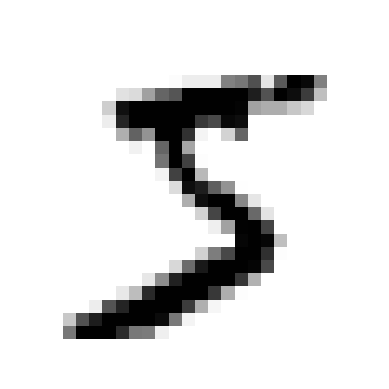

In [29]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [30]:
y[0]

'5'

In [31]:
import numpy as np
y = y.astype(np.uint8)

In [32]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
#Training a binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [36]:
from sklearn.linear_model import SGDClassifier

In [38]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [39]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [42]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [43]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

0.9669
0.91625
0.96785


In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [45]:
from sklearn.base import BaseEstimator

In [46]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
 never_5_clf = Never5Classifier()
    

In [48]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [49]:
from sklearn.model_selection import cross_val_predict

In [50]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [53]:
#Start from page 8, (Precision and Recall)
from sklearn.metrics import precision_score, recall_score

In [54]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [55]:
 recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [56]:
from sklearn.metrics import f1_score

In [57]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [58]:
 y_scores = sgd_clf.decision_function([some_digit])

In [59]:
y_scores

array([2164.22030239])

In [60]:
 threshold = 0

In [61]:
y_some_digit_pred = (y_scores > threshold)

In [62]:
print(y_some_digit_pred)

[ True]


In [63]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [73]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [74]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [75]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    #[...]


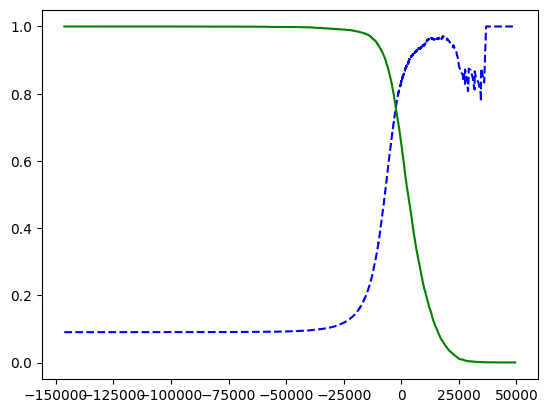

In [76]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [77]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [78]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [79]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [80]:
 recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [81]:
#Start, the ROC curve, page 13
from sklearn.metrics import roc_curve

In [82]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [83]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    

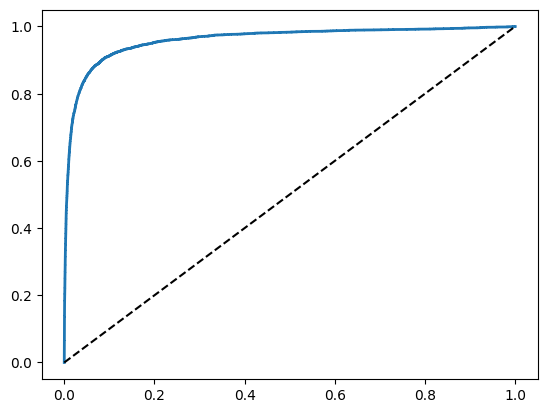

In [84]:
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
#Compute the area under the curve:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [86]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

In [88]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

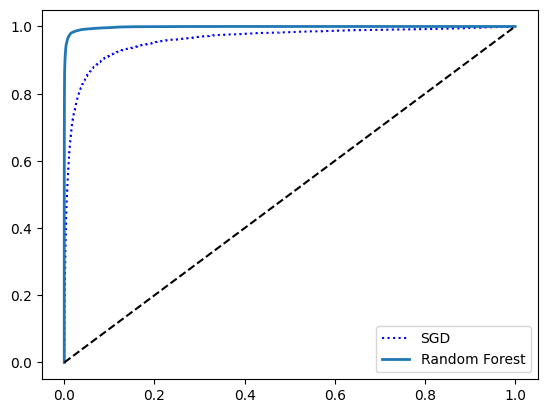

In [89]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [92]:
#Multiclass Classification

In [93]:
#SVC algorithm run
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [96]:
#Print out scores:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [97]:
#Highest Score:
np.argmax(some_digit_scores)

5

In [98]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [99]:
 svm_clf.classes_[5]

5

In [101]:
#Example to force the SVC to a one V rest classifier:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [102]:
 len(ovr_clf.estimators_)

10

In [103]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [104]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [105]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [106]:
#Increased Accuracy Score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [107]:
#Errors:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

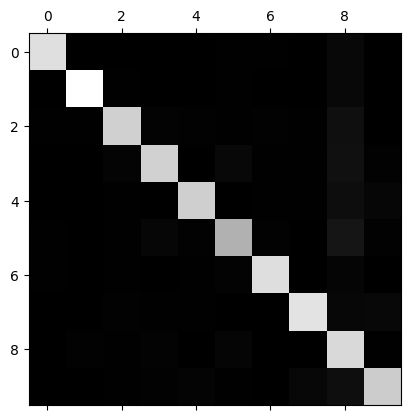

In [108]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [109]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

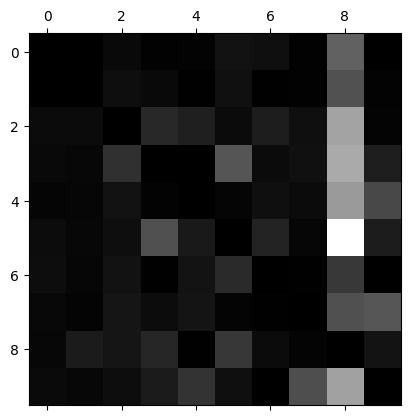

In [110]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [111]:
#Individual Errors, threes and fives:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [113]:
#MultiLable Classification:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [115]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [116]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [117]:
 y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [118]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [119]:
#Multiclass Output
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [123]:
#Clean Images:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

In [ ]:
'''
#NOTE:
#To set the same random state, please use the same seed number, 42.

np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)


#HW 2 Objectives:

1: Choose a different digit (other than 5 which is already used in the example). Train your classifier and plot the Precision-Recall versus the decision threshold as shown in Figure 3-4 on page 95.

2: Train your classifier for multiclass classification (i.e., for all the digits) and plot the confusion matrix for error analysis as shown on page 104 (It's the second confusion matrix figure.)

3: Do Exercise 1 and show the accuracy along with precision/recall/f-1 score (you can use sklearn.metrics.classification_report), and show your results in terms of accuracy.

4: Do Exercise 2. You can apply any transformation for the data augmentation (or any other tricks for performance gain) and show if you can achieve 98% or above accuracy.


#NOTE:
Remember, your test should be done only with `X_ts` and `y_ts`. 
You should not use any part of the test dataset for your training. (You can do whatever you want with your training dataset.)


'''

In [2]:
#Objective 1:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())




C:\Users\ChrisS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [11]:
#Define the X and Y
X, y = mnist["data"], mnist["target"]



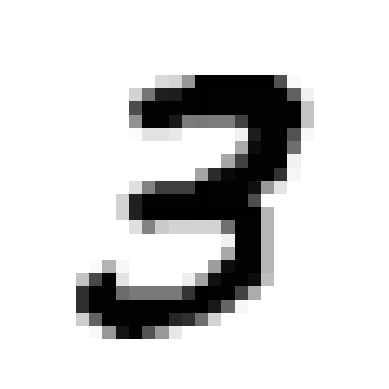

In [17]:
#Choose the Number to work with: Choosing number 3
some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [20]:
#Test Number

y[7] 

'3'

In [21]:
#Set DAtatype:
y = y.astype(np.uint8)

In [22]:
np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)
print("Finished Splitting")

Finished Splitting


In [23]:
#Training a binary classifier with the three data
y_train_3 = (y_tr == 3)
y_test_3 = (y_ts == 3)

In [25]:
#Observe Data
y_train_3.shape

(60000,)

In [26]:
y_test_3.shape

(10000,)

In [29]:
#Train Data using the SGD classifier with random state set to 42
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_tr, y_train_3)

print("Finished Running")

Finished Running


In [30]:
#Predict Digit, correct
sgd_clf.predict([some_digit])

array([ True])

In [32]:
#Plot the Precision-Recall versus the decision threshold as shown in Figure 3-4 on page 95

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_tr, y_train_3, cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

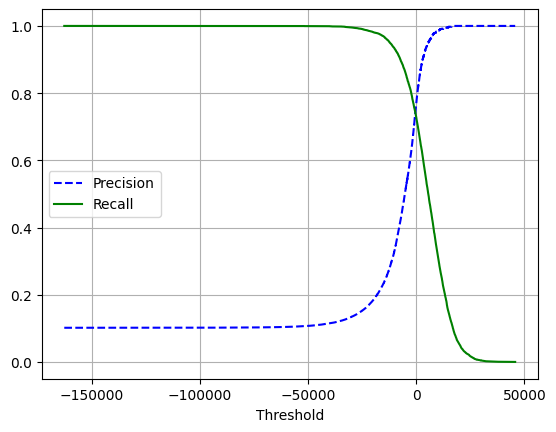

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.grid(True)
    plt.legend()
    # highlight the threshold and add the legend, axis label, and grid
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
#Objective Number 2
#2: Train your classifier for multiclass classification (i.e., for all the digits) and plot the confusion matrix for error analysis as shown on page 104 (It's the second confusion matrix figure.)

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

C:\Users\ChrisS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [10]:
#Define the X and Y
X, y = mnist["data"], mnist["target"]
#Set DAtatype:
y = y.astype(np.uint8)
np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)
print("Finished Splitting")

Finished Splitting


In [11]:
#Train Model using support vector maching.
print("Started Running")
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_tr, y_tr)
print("Finished Running")

Started Running
Finished Running


In [12]:
#Assign Some Digit, which is equal to 3
some_digit = X[7]

In [13]:
svm_clf.predict([some_digit])

array([3], dtype=uint8)

In [ ]:
#Note the algorithm predicted the correct digit, equal to 3.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
print("Started Running")
cross_val_score(svm_clf, X_tr, y_tr, cv=3, scoring="accuracy")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_tr.astype(np.float64))
cross_val_score(svm_clf, X_train_scaled, y_tr, cv=3, scoring="accuracy")
print("Ended Running")

Started Running
Ended Running


In [29]:
print("Started Running")
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_tr, cv=3)
print("End Running")

Started Running
End Running


In [30]:
print("Started Running")
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_tr, y_train_pred)
conf_mx
print("End Running")

Started Running
End Running


In [31]:
print(conf_mx)

[[5824    3   18    4    7    9   31    9   14    1]
 [   1 6608   45    9   10    2    7   21   13    9]
 [  17   13 5812   34   27    3   14   62   32    9]
 [   5   12   84 5789    4   61    2   71   62   17]
 [   7   11   54    1 5688    4   20   31   10   92]
 [  18    9   26   74   17 5102   54   40   20   16]
 [  24   10   41    1   14   42 5733   37   13    0]
 [   9   29   59    7   41    0    0 6017    5   71]
 [  17   39   53   54   22   47   19   31 5545   29]
 [   8   11   43   52   87   16    1  134   21 5549]]


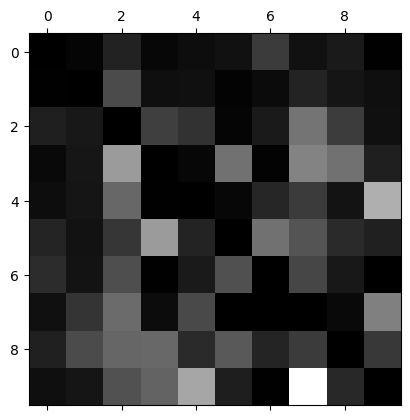

In [32]:
#Create the error analysis as shown on page 104.
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Objective 3: Do Exercise 1 and show the accuracy along with precision/recall/f-1 score (you can use sklearn.metrics.classification_report), and show your results in terms of accuracy.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

C:\Users\ChrisS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [3]:
#Define the X and Y
X, y = mnist["data"], mnist["target"]
#Set DAtatype:
y = y.astype(np.uint8)
np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)
print("Finished Splitting")

Finished Splitting


In [4]:
#Test on normal KNN
from sklearn.neighbors import KNeighborsClassifier
knnClassifier = KNeighborsClassifier()
knnClassifier.fit(X_tr, y_tr)
AccuracyScore = knnClassifier.score(X_ts, y_ts)
print(AccuracyScore)
#Received a score of .9696 for accuracy

0.9696


In [5]:
print("Started Test")
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(knnClassifier, X_ts, y_ts, cv=3)
print("Ended Test")

Started Test
Ended Test


In [6]:
#Print results
from sklearn.metrics import classification_report
print(classification_report(y_ts, y_pred, labels=[0,1,2,3,4,5,6,7,8,9],digits=4))

              precision    recall  f1-score   support

           0     0.9651    0.9837    0.9743       983
           1     0.8972    0.9922    0.9423      1152
           2     0.9712    0.9080    0.9385       967
           3     0.9237    0.9371    0.9304      1034
           4     0.9386    0.9117    0.9250       906
           5     0.9328    0.9338    0.9333       937
           6     0.9553    0.9792    0.9671       961
           7     0.9223    0.9450    0.9335      1055
           8     0.9820    0.8452    0.9085       969
           9     0.9003    0.9151    0.9076      1036

    accuracy                         0.9363     10000
   macro avg     0.9389    0.9351    0.9361     10000
weighted avg     0.9376    0.9363    0.9360     10000



In [7]:
#Will Aim now to get an accuracy score higher than 0.9696 using gridsearch.

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_neighbors': [6, 5, 9, 17], 'weights': ['uniform', 'distance']}]

In [9]:
print("Started Running")
grid = GridSearchCV(knnClassifier, param_grid, cv=3)
grid.fit(X_tr, y_tr)
print("Ended Running")

Started Running
Ended Running


In [10]:
print(grid.best_params_)

{'n_neighbors': 6, 'weights': 'distance'}


In [11]:
grid.best_score_

0.96995

In [12]:
#Slightly higher. Run with the best
print("Start Fit")
grid.best_estimator_.fit(X_tr, y_tr)
print("End Fit")

Start Fit
End Fit


In [13]:
#Test new Accuracy
accuracy = grid.score(X_ts, y_ts)

In [14]:
print(accuracy)

0.9709


In [15]:
#New 97% accuracy achieved.

In [16]:
#Setup new test statistics:
print("Started Test")
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(grid, X_ts, y_ts, cv=3)
print("Ended Test")

Started Test
Ended Test


In [17]:
#Print precision/recall/f-1 score
print(classification_report(y_ts, y_pred, labels=[0,1,2,3,4,5,6,7,8,9],digits=4))

              precision    recall  f1-score   support

           0     0.9709    0.9858    0.9783       983
           1     0.9057    0.9922    0.9470      1152
           2     0.9745    0.9080    0.9400       967
           3     0.9306    0.9342    0.9324      1034
           4     0.9451    0.9117    0.9281       906
           5     0.9386    0.9306    0.9346       937
           6     0.9554    0.9802    0.9676       961
           7     0.9314    0.9517    0.9414      1055
           8     0.9732    0.8617    0.9141       969
           9     0.8978    0.9324    0.9148      1036

    accuracy                         0.9401     10000
   macro avg     0.9423    0.9389    0.9398     10000
weighted avg     0.9412    0.9401    0.9399     10000



In [19]:
# Objective 4: Do Exercise 2. You can apply any transformation for the data augmentation (or any other tricks for performance gain) and show if you can achieve 98% or above accuracy.

In [20]:
#Import Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

C:\Users\ChrisS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [21]:
#Import packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [22]:
#Define the X and Y
X, y = mnist["data"], mnist["target"]
#Set DAtatype:
y = y.astype(np.uint8)
np.random.seed(42)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=10000, random_state=42)
print("Finished Splitting")

Finished Splitting


In [23]:
from scipy.ndimage import shift

In [24]:
def shiftedImage(number, corrdinate1, corrdinate2):
    number = number.reshape((28, 28))
    
    shiftedImage = shift(number, [corrdinate2, corrdinate1], cval=0, mode="constant")
    
    return shiftedImage.reshape([-1])


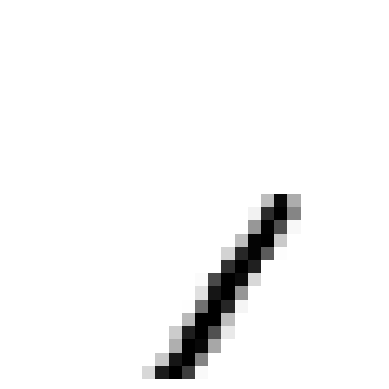

In [25]:
image = X_tr[3]  # some random digit to demo
Image = shiftedImage(image, 0, 10)
Image2 = shiftedImage(image, -10, 0)

#Test1
Image = Image.reshape(28, 28)
plt.imshow(Image, cmap="binary")
plt.axis("off")
plt.show()


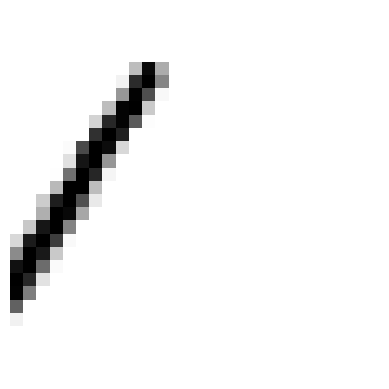

In [26]:
#Test2
Image2 = Image2.reshape(28, 28)
plt.imshow(Image2, cmap="binary")
plt.axis("off")
plt.show()

In [30]:
print("Started Running")
X_tr1 = [data for data in X_tr]
y_tr1 = [target for target in y_tr]

for coordinate1, coordinate2 in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for data, target in zip(X_tr, y_tr):
        X_tr1.append(shiftedImage(image, coordinate1, coordinate2))
        y_tr1.append(label)

#Change to numpy array:
X_tr1 = np.array(X_tr1)
y_tr1 = np.array(y_tr1)
print("Ended Running")

Started Running
Ended Running


In [31]:
#Shuffle all the arrays
shuffle = np.random.permutation(len(X_tr1))
y_tr1 = y_tr1[shuffle]
X_tr1 = X_tr1[shuffle]


In [36]:
#Define the algorithm
knnAlgorithm = KNeighborsClassifier(**grid.best_params_)

In [33]:
print("Started Running")
knnAlgorithm.fit(X_tr1, y_tr1)
print("Ended Running")

Started Running
Ended Running


In [34]:
print("Started Running")
accuracyScore = knnAlgorithm.score(X_ts, y_ts)
accuracyScore
print("Ended Running")

Started Running
Ended Running


In [35]:
print(accuracyScore)

0.9709
